In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('WATER_TREAT_23102020144712652.csv')
data.head()

,VAR,Variable,COU,Country,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUS,Australia,2017,2017,PC,Percentage,0,Units,NaN,NaN,92.69,NaN,NaN
1,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUS,Australia,2018,2018,PC,Percentage,0,Units,NaN,NaN,92.64,NaN,NaN
2,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUT,Austria,2018,2018,PC,Percentage,0,Units,NaN,NaN,100.00,NaN,NaN
3,TOTPUBSEW,Total public sewerage (% of resident populatio...,BEL,Belgium,2017,2017,PC,Percentage,0,Units,NaN,NaN,88.00,NaN,NaN
4,TOTPUBSEW,Total public sewerage (% of resident populatio...,CAN,Canada,2017,2017,PC,Percentage,0,Units,NaN,NaN,85.70,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VAR                    382 non-null    object 
 1   Variable               382 non-null    object 
 2   COU                    382 non-null    object 
 3   Country                382 non-null    object 
 4   YEA                    382 non-null    int64  
 5   Year                   382 non-null    int64  
 6   Unit Code              382 non-null    object 
 7   Unit                   382 non-null    object 
 8   PowerCode Code         382 non-null    int64  
 9   PowerCode              382 non-null    object 
 10  Reference Period Code  0 non-null      float64
 11  Reference Period       0 non-null      float64
 12  Value                  382 non-null    float64
 13  Flag Codes             42 non-null     object 
 14  Flags                  42 non-null     object 
dtypes: flo

In [4]:
data = data.drop(['Reference Period Code','Reference Period','Flag Codes','Flags'],axis=1)
data.head()

,VAR,Variable,COU,Country,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
0,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUS,Australia,2017,2017,PC,Percentage,0,Units,92.69
1,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUS,Australia,2018,2018,PC,Percentage,0,Units,92.64
2,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUT,Austria,2018,2018,PC,Percentage,0,Units,100.00
3,TOTPUBSEW,Total public sewerage (% of resident populatio...,BEL,Belgium,2017,2017,PC,Percentage,0,Units,88.00
4,TOTPUBSEW,Total public sewerage (% of resident populatio...,CAN,Canada,2017,2017,PC,Percentage,0,Units,85.70


In [5]:
data['PowerCode Code'].unique()

array([0], dtype=int64)

In [6]:
data['PowerCode'].unique()

array(['Units'], dtype=object)

In [7]:
data['Unit'].unique()

array(['Percentage'], dtype=object)

In [8]:
data['Unit Code'].unique()

array(['PC'], dtype=object)

In [9]:
data['Variable'].unique()

array(['Total public sewerage (% of resident population connected to urban wastewater collecting system = PUBTOTTR + PUBNOTR)',
       'Connected to a wastewater treatment plant without treatment',
       'Primary treatment', 'Secondary treatment', 'Tertiary treatment',
       'Population connected to independent treatment',
       'Total treatment ( = PUBTOTTR + INDEPDTR)',
       'Public total treatment (connected to a wastewater treatment plant = PUBMECTR + PUBBIOTR + PUBADVTR + OTHERTR)',
       'Unspecified (other) treatment ',
       'Not connected to public sewerage or independent treatment'],
      dtype=object)

In [10]:
data['Variable'].nunique()

10

In [11]:
data['VAR'].nunique()

10

In [12]:
data.columns

Index(['VAR', 'Variable', 'COU', 'Country', 'YEA', 'Year', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'Value'],
      dtype='object')

In [13]:
for i in data.columns:
    if data[i].nunique() > 1:
        print(i)

VAR
Variable
COU
Country
YEA
Year
Value


In [14]:
non_unique_columns = [i for i in data.columns if data[i].nunique() > 1]
non_unique_columns

['VAR', 'Variable', 'COU', 'Country', 'YEA', 'Year', 'Value']

In [15]:
data= data[non_unique_columns]
data.head()

,VAR,Variable,COU,Country,YEA,Year,Value
0,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUS,Australia,2017,2017,92.69
1,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUS,Australia,2018,2018,92.64
2,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUT,Austria,2018,2018,100.00
3,TOTPUBSEW,Total public sewerage (% of resident populatio...,BEL,Belgium,2017,2017,88.00
4,TOTPUBSEW,Total public sewerage (% of resident populatio...,CAN,Canada,2017,2017,85.70


In [16]:
data= data.drop(['COU','YEA','Variable'],axis=1)
data

,VAR,Country,Year,Value
0,TOTPUBSEW,Australia,2017,92.69
1,TOTPUBSEW,Australia,2018,92.64
2,TOTPUBSEW,Austria,2018,100.00
3,TOTPUBSEW,Belgium,2017,88.00
4,TOTPUBSEW,Canada,2017,85.70
...,...,...,...,...
377,PUBNOTR,Australia,2018,0.00
378,OTHERTR,Australia,2017,0.00
379,OTHERTR,Australia,2018,0.00
380,TOTTR,Australia,2017,100.00


In [17]:
data['Country'].replace("Israel","Palestine",inplace= True)
data['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Hungary', 'Ireland', 'Japan',
       'Korea', 'Luxembourg', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Sweden', 'Turkey', 'Chile',
       'Estonia', 'Palestine', 'Slovenia', 'Mexico', 'Latvia',
       'Lithuania'], dtype=object)

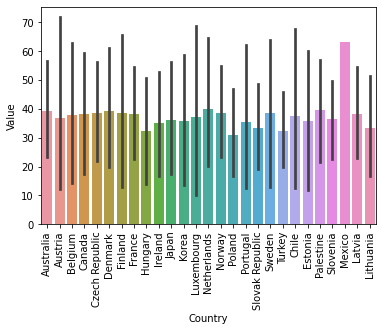

In [18]:
sns.barplot(data= data, x= 'Country', y='Value')
plt.xticks(rotation= 90)
plt.show()

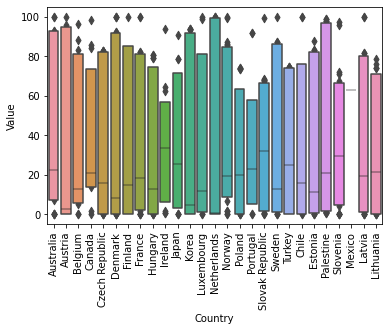

In [19]:
sns.boxenplot(data= data, x= 'Country', y='Value')
plt.xticks(rotation= 90)
plt.show()

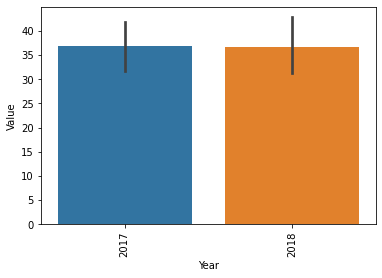

In [20]:
sns.barplot(data= data, x= 'Year', y='Value')
plt.xticks(rotation= 90)
plt.show()

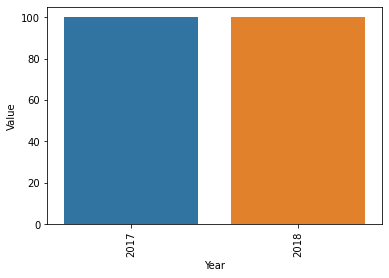

In [21]:
sns.barplot(data= data, x= 'Year', y='Value',estimator='max')
plt.xticks(rotation= 90)
plt.show()

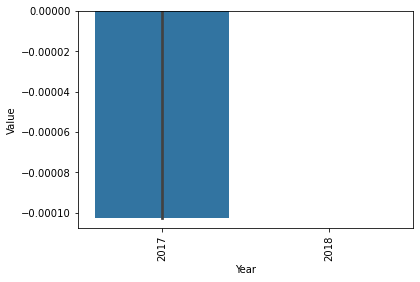

In [22]:
sns.barplot(data= data, x= 'Year', y='Value',estimator='min')
plt.xticks(rotation= 90)
plt.show()

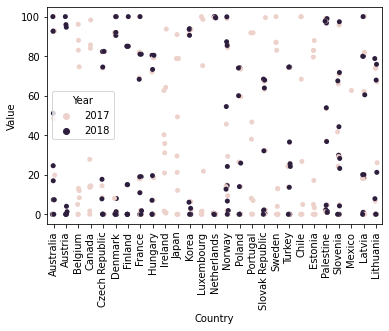

In [23]:
sns.stripplot(data= data, x= 'Country',hue='Year', y='Value')
plt.xticks(rotation= 90)
plt.show()

In [24]:
data['Value'].describe()

count    382.000000
mean      36.792743
std       38.341812
min       -0.000103
25%        0.200000
50%       18.480000
75%       78.795000
max      100.000000
Name: Value, dtype: float64

In [25]:
columns_to_encode = ['VAR', 'Country']

label_encoder = LabelEncoder()

for column in data[columns_to_encode]:
    data[column] = label_encoder.fit_transform(data[column])
data.head()    

,VAR,Country,Year,Value
0,8,0,2017,92.69
1,8,0,2018,92.64
2,8,1,2018,100.00
3,8,2,2017,88.00
4,8,3,2017,85.70


In [26]:
data.sample(10)

,VAR,Country,Year,Value
153,3,19,2018,54.500000
308,2,26,2018,0.000000
110,4,10,2018,7.075000
95,5,20,2017,4.800000
306,1,25,2017,13.000000
309,1,26,2017,25.760000
278,2,10,2018,0.000000
348,8,15,2018,78.780000
352,4,15,2017,6.670000
280,1,10,2018,19.566002


In [27]:
# Assuming you have a Pandas DataFrame called 'data' with your original dataset
# Let's assume 'data' has columns: 'var', 'Country', 'Variable', 'year', and 'Value'

# Define a function to perform data augmentation
def augment_data(original_data, num_samples_to_generate):
    augmented_data = original_data.copy()
    
    # Define the range for random noise or other augmentations
    noise_range = 0.1  # You can adjust this as needed
    
    for _ in range(num_samples_to_generate):
        # Randomly select a row from the original data
        original_sample = original_data.sample()
        
        # Create a new augmented sample by adding random noise to 'Value' (you can customize this)
        augmented_sample = original_sample.copy()
        augmented_sample['Value'] += np.random.uniform(-noise_range, noise_range)
        
        # Append the augmented sample to the augmented data
        augmented_data = augmented_data.append(augmented_sample, ignore_index=True)
    
    return augmented_data

# Perform data augmentation to generate more samples
num_samples_to_generate = 1000  # Adjust as needed
augmented_data = augment_data(data, num_samples_to_generate)

# Now, 'augmented_data' contains your original data with additional augmented samples
# You can use 'augmented_data' for training your machine learning model

augmented_data.sample(10)

,VAR,Country,Year,Value
86,5,19,2018,24.200000
782,7,22,2017,91.836860
948,3,23,2017,1.880402
862,3,7,2017,79.542370
1352,6,2,2017,4.907994
583,5,20,2017,4.708812
1166,0,23,2017,32.292336
410,9,0,2017,99.904486
313,1,7,2017,17.099998
404,8,20,2018,98.936700


In [28]:
x = augmented_data.drop(columns=['Value'])
y = pd.DataFrame(augmented_data['Value'])
x.shape, y.shape

((1382, 3), (1382, 1))

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1105, 3), (277, 3), (1105, 1), (277, 1))

In [30]:
# Create and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mae

24.14654057470141

In [31]:
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mse

820.9972348563712

In [32]:
lr_r2 = r2_score(y_test, lr_predictions)
lr_r2

0.4076225580059144

In [33]:
# Create and train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.squeeze())

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regression:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"R-squared: {rf_r2}")

Random Forest Regression:
MAE: 0.7791794550123263
MSE: 7.343830227140992
R-squared: 0.9947011765939093


In [34]:
# Create and train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train.squeeze())

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regression:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"R-squared: {rf_r2}")

Random Forest Regression:
MAE: 0.7791784128938333
MSE: 7.3501063876981965
R-squared: 0.994696648130501


In [35]:
# Create and train a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train.squeeze())

# Make predictions on the test set
gbr_predictions = gbr_model.predict(X_test)

# Evaluate the model
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_r2 = r2_score(y_test, gbr_predictions)

print("Gradient Boosting Regressor :")
print(f"MAE: {gbr_mae}")
print(f"MSE: {gbr_mse}")
print(f"R-squared: {gbr_r2}")

Gradient Boosting Regressor :
MAE: 6.08373669428646
MSE: 91.557142885365
R-squared: 0.9339384058848775


In [36]:
# Create and train an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train.squeeze())

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost:")
print(f"MAE: {xgb_mae}")
print(f"MSE: {xgb_mse}")
print(f"R-squared: {xgb_r2}")

XGBoost:
MAE: 1.6875740980562137
MSE: 9.997782311853634
R-squared: 0.9927862598556185


In [37]:
# Create and train a LightGBM model
lgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'random_state': 42
}

lgb_model = lgb.LGBMRegressor(**lgb_params)
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the model
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_r2 = r2_score(y_test, lgb_predictions)

print("lightgbm :")
print(f"MAE: {lgb_mae}")
print(f"MSE: {lgb_mse}")
print(f"R-squared: {lgb_r2}")

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 1105, number of used features: 3
[LightGBM] [Info] Start training from score 35.516283
lightgbm :
MAE: 4.257100214775733
MSE: 44.15945919850614
R-squared: 0.9681374475220619


In [38]:
# Create and train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.squeeze())

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regression:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"R-squared: {rf_r2}")

Random Forest Regression:
MAE: 0.7791794550123263
MSE: 7.343830227140992
R-squared: 0.9947011765939093


In [41]:
import h5py

# Assuming you have already trained your Random Forest model and stored it in 'rf_model'

# Define the file path where you want to save the model
model_file_path = 'random_forest_model.h5'

# Create an HDF5 file
with h5py.File(model_file_path, 'w') as file:
    # Save each estimator separately with a unique name
    for idx, estimator in enumerate(rf_model.estimators_):
        estimator_group_name = f'estimator_{idx}'
        estimator_group = file.create_group(estimator_group_name)
        
        # Save the attributes of the estimator
        for k, v in estimator.__dict__.items():
            try:
                estimator_group.create_dataset(k, data=v)
            except TypeError:
                pass

print(f"Random Forest model saved to {model_file_path}")


Random Forest model saved to random_forest_model.h5
